In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.shape

(991346, 24)

# Preprocessing

In [5]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

## Encoding

In [6]:
df1 = df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [8]:
le = LabelEncoder()

In [9]:
for col in df1.columns:
    if not is_numeric_dtype(df1[col]):
        df1[col] = le.fit_transform(df1[col])

In [10]:
df1.head()


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df1.drop('DRK_YN', axis=1)
y = df1[['DRK_YN']]

In [13]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
xTrain1, xTest1, yTrain1, yTest1 = [xTrain, xTest, yTrain, yTest].copy()
xTrain2, xTest2, yTrain2, yTest2 = [xTrain, xTest, yTrain, yTest].copy()

# Knn

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(xTrain1, yTrain1)

/home/applehx7/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [18]:
knn_test_predicted = knn.predict(xTest1)

In [19]:
knn_test_predicted

array([1, 0, 0, ..., 0, 0, 1])

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier()

In [22]:
dt.fit(xTrain2, yTrain2)

DecisionTreeClassifier()

In [23]:
decisionTree_predicted = dt.predict(xTest2)

In [24]:
decisionTree_predicted

array([1, 1, 1, ..., 0, 0, 1])

# Knn performance

In [25]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
classification_report(knn_test_predicted, yTest1)

'              precision    recall  f1-score   support\n\n           0       0.64      0.66      0.65    145172\n           1       0.67      0.65      0.66    152232\n\n    accuracy                           0.66    297404\n   macro avg       0.66      0.66      0.66    297404\nweighted avg       0.66      0.66      0.66    297404\n'

In [27]:
accuracy_score(knn_test_predicted, yTest1)

0.6563496119756291

In [28]:
precision_score(knn_test_predicted, yTest1)

0.6687239051107199

In [29]:
recall_score(knn_test_predicted, yTest1)

0.6512625466393399

In [30]:
f1_score(knn_test_predicted, yTest1)

0.6598777326291478

In [31]:
confusion_matrix(knn_test_predicted, yTest1)

array([[96058, 49114],
       [53089, 99143]])

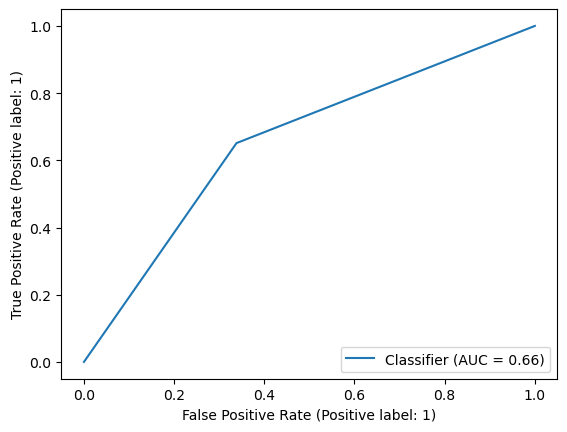

In [32]:
RocCurveDisplay.from_predictions(knn_test_predicted, yTest1)

<Axes: >

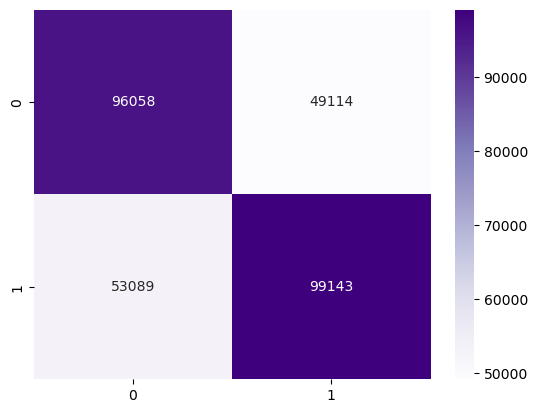

In [33]:
sns.heatmap(confusion_matrix(knn_test_predicted, yTest1), annot=True, cmap='Purples', fmt='d')

<Axes: >

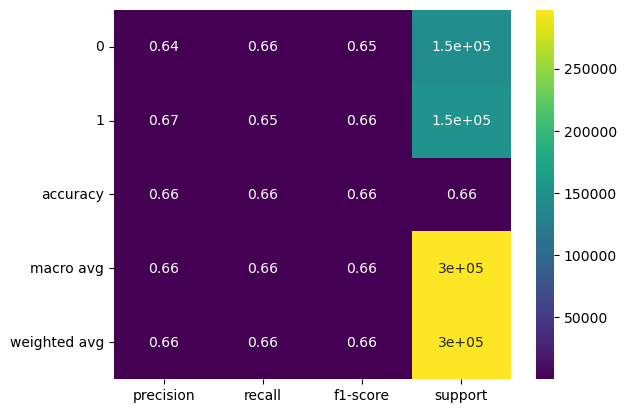

In [34]:
report = classification_report(knn_test_predicted, yTest1)
report_dict = classification_report(knn_test_predicted, yTest1, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
sns.heatmap(report_df, annot=True, cmap='viridis')

# Decision Tree Performance

In [35]:
classification_report(decisionTree_predicted, yTest2)

'              precision    recall  f1-score   support\n\n           0       0.64      0.65      0.65    148455\n           1       0.65      0.64      0.64    148949\n\n    accuracy                           0.65    297404\n   macro avg       0.65      0.65      0.65    297404\nweighted avg       0.65      0.65      0.65    297404\n'

In [36]:
accuracy_score(decisionTree_predicted, yTest2)

0.6451224596844696

In [37]:
precision_score(decisionTree_predicted, yTest2)

0.6463910641656043

In [38]:
recall_score(decisionTree_predicted, yTest2)

0.6433880052904014

In [39]:
f1_score(decisionTree_predicted, yTest2)

0.6448860386398659

In [40]:
confusion_matrix(decisionTree_predicted, yTest2)

array([[96030, 52425],
       [53117, 95832]])

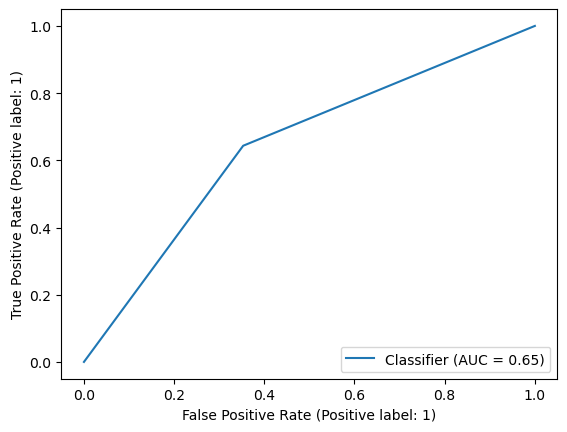

In [41]:
RocCurveDisplay.from_predictions(decisionTree_predicted, yTest2)

<Axes: >

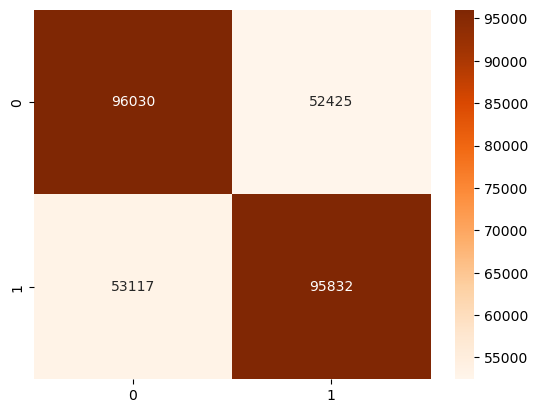

In [42]:
sns.heatmap(confusion_matrix(decisionTree_predicted, yTest2), annot=True, cmap='Oranges', fmt='d')

<Axes: >

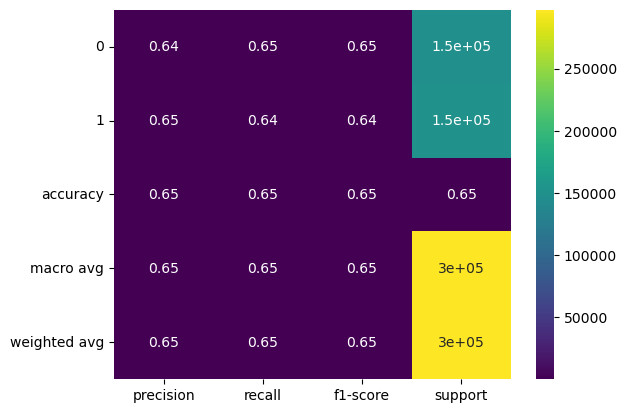

In [43]:
report2 = classification_report(decisionTree_predicted, yTest2)
report_dict2 = classification_report(decisionTree_predicted, yTest2, output_dict=True)
report_df2 = pd.DataFrame(report_dict2).transpose()
sns.heatmap(report_df2, annot=True, cmap='viridis')